In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations

In [ ]:
yolov8 = {
    'storage (mb)': 83.59,
    'mAP (%)': 55.86,
    'inference time (ms)': 70,
    'training time (hours)': 0.271,
    'peak GPU usage (gb)': 9
}

frcnn = {
    'storage (mb)': 70.11,
    'mAP (%)': 50.81,
    'inference time (ms)': 170,
    'training time (hours)': 0.215,
    'peak GPU usage (gb)': 6.95
}

rtdetr = {
    'storage (mb)': 63.09,
    'mAP (%)': 60.37,
    'inference time (ms)': 101,
    'training time (hours)': 0.401,
    'peak GPU usage (gb)': 11.67
}

In [ ]:
cost = lambda x: ((x['peak GPU usage (gb)']/15)*69.55)

yolov8['cost'] = cost(yolov8)
frcnn['cost'] = cost(frcnn)
rtdetr['cost'] = cost(rtdetr)

del yolov8['peak GPU usage (gb)']
del frcnn['peak GPU usage (gb)']
del rtdetr['peak GPU usage (gb)']

print(f'YOLOv8       : {yolov8}')
print(f'Faster R-CNN : {frcnn}')
print(f'RT-DETR      : {rtdetr}')

YOLOv8       : {'storage (mb)': 83.59, 'mAP (%)': 55.86, 'inference time (ms)': 70, 'training time (hours)': 0.271, 'cost': 41.73}
Faster R-CNN : {'storage (mb)': 70.11, 'mAP (%)': 50.81, 'inference time (ms)': 170, 'training time (hours)': 0.215, 'cost': 32.22483333333333}
RT-DETR      : {'storage (mb)': 63.09, 'mAP (%)': 60.37, 'inference time (ms)': 101, 'training time (hours)': 0.401, 'cost': 54.109899999999996}


In [ ]:
max_val = {
    'storage (mb)': max(yolov8['storage (mb)'], frcnn['storage (mb)'], rtdetr['storage (mb)']),
    'mAP (%)': max(yolov8['mAP (%)'], frcnn['mAP (%)'], rtdetr['mAP (%)']),
    'inference time (ms)': max(yolov8['inference time (ms)'], frcnn['inference time (ms)'], rtdetr['inference time (ms)']),
    'training time (hours)': max(yolov8['training time (hours)'], frcnn['training time (hours)'], rtdetr['training time (hours)']),
    'cost': max(yolov8['cost'], frcnn['cost'], rtdetr['cost'])
}

min_val = {
    'storage (mb)': min(yolov8['storage (mb)'], frcnn['storage (mb)'], rtdetr['storage (mb)']),
    'mAP (%)': min(yolov8['mAP (%)'], frcnn['mAP (%)'], rtdetr['mAP (%)']),
    'inference time (ms)': min(yolov8['inference time (ms)'], frcnn['inference time (ms)'], rtdetr['inference time (ms)']),
    'training time (hours)': min(yolov8['training time (hours)'], frcnn['training time (hours)'], rtdetr['training time (hours)']),
    'cost': min(yolov8['cost'], frcnn['cost'], rtdetr['cost'])
}

max_norm = lambda max, min, x, y: (9*((x[y]-min[y])/(max[y]-min[y]))) + 1
min_norm = lambda max, min, x, y: (9*((max[y]-x[y])/(max[y]-min[y]))) + 1

yolov8_norm = []
frcnn_norm = []
rtdetr_norm = []

for key in yolov8:
    if key == 'mAP (%)':
        yolov8_norm.append(float('%.3f' % max_norm(max_val, min_val, yolov8, key)))
    else:
        yolov8_norm.append(float('%.3f' % min_norm(max_val, min_val, yolov8, key)))

for key in frcnn:
    if key == 'mAP (%)':
        frcnn_norm.append(float('%.3f' % max_norm(max_val, min_val, frcnn, key)))
    else:
        frcnn_norm.append(float('%.3f' % min_norm(max_val, min_val, frcnn, key)))

for key in rtdetr:
    if key == 'mAP (%)':
        rtdetr_norm.append(float('%.3f' % max_norm(max_val, min_val, rtdetr, key)))
    else:
        rtdetr_norm.append(float('%.3f' % min_norm(max_val, min_val, rtdetr, key)))

print(f'YOLOv8       : {yolov8_norm}')
print(f'Faster R-CNN : {frcnn_norm}')
print(f'RT-DETR      : {rtdetr_norm}')

YOLOv8       : [1.0, 5.754, 10.0, 7.29, 6.091]
Faster R-CNN : [6.918, 1.0, 1.0, 10.0, 10.0]
RT-DETR      : [10.0, 10.0, 7.21, 1.0, 1.0]


In [ ]:
def calculate_weighted_score(scores, weights):
    return sum(s * w for s, w in zip(scores, weights))

In [ ]:
weights = [0.175, 0.25, 0.225, 0.2, 0.15]
weight_combinations = list(permutations(weights))

yolov8_scores = []
frcnn_scores = []
rtdetr_scores = []
yolov8_wins, frcnn_wins, rtdetr_wins = 0, 0, 0

for weights in weight_combinations:
    rt_score = calculate_weighted_score(yolov8_norm, weights)
    yolo_score = calculate_weighted_score(frcnn_norm, weights)
    fridet_score = calculate_weighted_score(rtdetr_norm, weights)

    yolov8_scores.append(rt_score)
    frcnn_scores.append(yolo_score)
    rtdetr_scores.append(fridet_score)

    if rt_score > yolo_score and rt_score > fridet_score:
        yolov8_wins += 1
    elif yolo_score > rt_score and yolo_score > fridet_score:
        frcnn_wins += 1
    else:
        rtdetr_wins += 1

print(f'YOLOv8 wins       : {yolov8_wins}')
print(f'Faster R-CNN wins : {frcnn_wins}')
print(f'RT-DETR wins      : {rtdetr_wins}')

YOLOv8 wins       : 53
Faster R-CNN wins : 31
RT-DETR wins      : 36


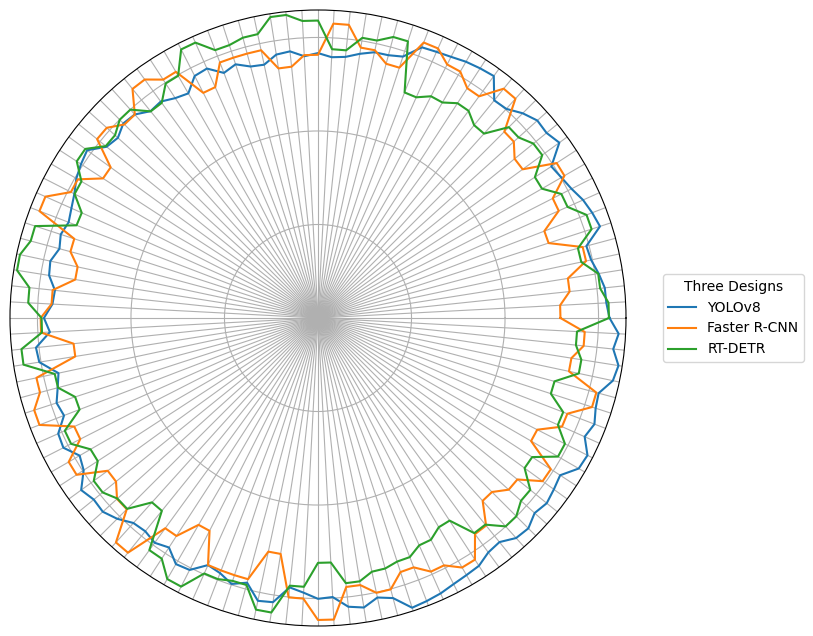

In [ ]:
num_vars = len(weight_combinations)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

yolov8_scores += yolov8_scores[:1]
frcnn_scores += frcnn_scores[:1]
rtdetr_scores += rtdetr_scores[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, yolov8_scores, linewidth=1.5, label='YOLOv8')
ax.plot(angles, frcnn_scores, linewidth=1.5, label='Faster R-CNN')
ax.plot(angles, rtdetr_scores, linewidth=1.5, label='RT-DETR')

ax.set_yticks(range(0, 8, 2))
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])

plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='Three Designs')
plt.show()